# Meteostat 

- A Python library provides a simple API for accessing **open weather** and **climate data**.


- Meteorological data provided by Meteostat (https://dev.meteostat.net) under the terms of the Creative Commons Attribution-NonCommercial 4.0 International Public License. The code is licensed under the **MIT license**.

- The **historical observations** and **statistics** are collected by Meteostat from different public interfaces, most of which are governmental.

    - Deutscher Wetterdienst
    - NOAA - National Weather Service
    - NOAA - Global Historical Climatology Network
    - NOAA - Integrated Surface Database
    - Government of Canada - Open Data 
    - MET Norway 
    - European Data Portal
    - Offene Daten Österreich 


- Guide:  https://dev.meteostat.net/python/

## Import modules

In [78]:
# pip install meteostat

from meteostat import Stations, Point, Daily, Monthly, Hourly, Normals

from datetime import datetime
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

import warnings
warnings.filterwarnings('ignore', 'nested sequences', FutureWarning)

### Sort and filter weather stations by physical distance

In [64]:
# Call the Stations class
stations = Stations()
# Get nearby weather stations
# radius: Radius in meters around geographical point
stations = stations.nearby(9.03, 38.75, 8000)
# Fetch the first station
station = stations.fetch(1)
# Print DataFrame
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
63450,Addis Ababa,ET,CN,63450,HAAB,8.9833,38.8,2355.0,Africa/Addis_Ababa,1957-01-01,2024-05-24,1957-02-13,2024-05-22,1898-01-01,2021-01-01,7557.673687


In [110]:
# Set time period
start = datetime(2020, 1, 1)
end = datetime(2022, 12, 31)

### Get Hourly Data

In [111]:
# Get data
data_hourly = Hourly(station, start, end)

# normalize method makes sure that gaps in the time series are filled.
# data_hourly = data_hourly.normalize()

# Fetch data
data_hourly = data_hourly.fetch()

# Print DataFrame
data_hourly.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2020-01-01 00:00:00,12.4,6.9,69.0,NaN,NaN,80.0,7.2,NaN,1015.9,NaN,2.0
2020-01-01 01:00:00,12.0,7.1,72.0,NaN,NaN,350.0,3.6,NaN,1025.0,NaN,1.0
2020-01-01 02:00:00,10.9,6.6,75.0,NaN,NaN,49.0,7.4,NaN,1017.5,NaN,1.0
2020-01-01 03:00:00,11.4,6.7,73.0,NaN,NaN,70.0,7.2,NaN,1014.7,NaN,2.0
2020-01-01 04:00:00,12.2,7.3,72.0,NaN,NaN,51.0,9.3,NaN,1018.7,NaN,1.0


### Export to CSV

In [72]:
data_hourly.to_csv('data_hourly.csv')

### Get Daily Data 

In [115]:
# Get daily data
data_daily = Daily(station, start, end)


# normalize method makes sure that gaps in the time series are filled.
#data_daily = data_daily.normalize()

# interpolate method fills gaps in the time series by linear interpolation.
# data_daily = data_daily.interpolate()

# Fetch data
data_daily = data_daily.fetch()

# Print DataFrame   
data_daily.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2020-01-01,16.6,7.0,24.0,NaN,NaN,80.0,14.6,NaN,1018.5,NaN
2020-01-02,17.1,9.8,24.0,NaN,NaN,70.0,16.1,NaN,1021.5,NaN
2020-01-03,17.3,11.5,24.0,NaN,NaN,86.0,14.6,NaN,1021.5,NaN
2020-01-04,17.4,10.0,25.4,NaN,NaN,86.0,13.8,NaN,1020.7,NaN
2020-01-05,18.3,10.0,25.2,NaN,NaN,106.0,11.8,NaN,1018.9,NaN


### Get Monthly Data 

In [118]:
# Get monthly data
data_monthly = Monthly(station, start, end)

# normalize method makes sure that gaps in the time series are filled.
# data_monthly = data_monthly.normalize()

# interpolate method fills gaps in the time series by linear interpolation.
# data_monthly = data_monthly.interpolate()

# Fetch data
data_monthly = data_monthly.fetch()

# Print DataFrame
data_monthly.head()


,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2020-01-01,17.0,10.6,24.1,0.0,13.5,1013.7,NaN
2020-02-01,18.3,11.6,25.4,NaN,15.4,1021.1,NaN
2020-03-01,19.7,13.7,25.8,NaN,12.7,1019.7,NaN
2020-04-01,18.9,13.8,25.6,NaN,13.2,1020.1,NaN
2020-05-01,18.4,13.1,25.0,NaN,11.2,NaN,NaN


### Filter weather stations by rectangular geographical boundaries

In [132]:
stations = Stations()
station = stations.bounds((9.5, 38), (8.5, 39))

print('Stations in Ethiopia:', station.count())

station = station.fetch()

# Print DataFrame
station


Stations in Ethiopia: 2


,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
63450,Addis Ababa,ET,CN,63450,HAAB,8.9833,38.8,2355.0,Africa/Addis_Ababa,1957-01-01,2024-05-24,1957-02-13,2024-05-22,1898-01-01,2021-01-01
63451,Harar Meda,ET,CN,63451,HAHM,8.7333,39.0,1876.0,Africa/Addis_Ababa,1957-01-09,2024-05-09,1951-01-01,1988-10-31,1951-01-01,1988-01-01


### Filter weather stations by country and state/region codes

In [133]:
stations = Stations()
stations = stations.region('ET', 'CN')

print('Stations in Ethiopia:', stations.count())

station = stations.fetch()

station

Stations in Ethiopia: 19


,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
63329,Axum,ET,CN,63329,HAAX,14.1167,38.7167,2134.0,Africa/Addis_Ababa,1989-04-21,1989-11-26,NaT,NaT,NaT,NaT
63330,Makale,ET,CN,63330,HAMK,13.5000,39.4833,2212.0,Africa/Addis_Ababa,1957-12-09,2024-05-09,1963-01-01,1988-12-31,1963-01-01,1988-01-01
63331,Gondar,ET,CN,63331,HAGN,12.5333,37.4333,1985.0,Africa/Addis_Ababa,1957-01-01,2024-05-09,1952-06-04,2023-09-26,1952-01-01,2021-01-01
63332,Bahar Dar,ET,CN,63332,HABD,11.6000,37.4000,1820.0,Africa/Addis_Ababa,1973-11-29,2024-05-09,1961-07-08,1988-12-31,1961-01-01,1987-01-01
63333,Combolcha,ET,CN,63333,HADC,11.0833,39.7167,1864.0,Africa/Addis_Ababa,1957-01-04,2024-05-09,1952-06-11,2024-04-22,1952-01-01,2021-01-01
63334,Debremarcos,ET,CN,63334,HADM,10.3500,37.7167,2476.0,Africa/Addis_Ababa,1957-01-01,2024-05-09,1953-11-01,1987-12-31,1953-01-01,1987-01-01
63340,Lekemti,ET,CN,63340,<NA>,9.0500,36.6000,1950.0,Africa/Addis_Ababa,1973-09-09,2024-05-09,1970-12-01,1987-12-31,1971-01-01,1987-01-01
63402,Jimma,ET,CN,63402,HAJM,7.6667,36.8333,1676.0,Africa/Addis_Ababa,1957-01-01,2024-05-09,1952-06-01,2023-12-30,1952-01-01,2021-01-01
63403,Gore,ET,CN,63403,HAGR,8.1667,35.5500,1974.0,Africa/Addis_Ababa,1957-01-01,2024-05-09,1952-06-01,2023-10-02,1914-01-01,2021-01-01


## Monthly

In [43]:
# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

# Create Point for Addis Ababa, Ethiopia
addis_ababa = Point(9.03, 38.74, 2355) # lat, lon ,  elevation


# Get daily data for 2023
data = Monthly(addis_ababa, start, end)

data = data.normalize()

data = data.fetch()

data.head()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2023-01-01,16.2,9.3,23.3,2.8,15.3,1023.3,NaN
2023-02-01,17.6,10.7,25.7,8.2,15.5,1023.4,NaN
2023-03-01,17.4,12.4,23.6,152.3,11.9,1022.1,NaN
2023-04-01,17.8,12.9,24.2,138.3,11.9,1021.8,NaN
2023-05-01,17.5,13.4,23.6,203.1,10.1,1023.2,NaN


## Climate Normals

In [120]:
# Get Normals data
normal = Normals('63450', 1981, 2010)

normal = normal.fetch()

normal.head()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
month,,,,,,,
1,15.6,7.4,23.8,14.2,NaN,1012.2,16609.1
2,16.8,8.7,24.9,38.1,NaN,1011.0,13521.4
3,17.9,10.6,25.2,66.2,NaN,1010.2,15047.1
4,18.2,11.4,25.1,93.0,NaN,1009.5,13061.5
5,18.4,11.5,25.2,85.4,NaN,1009.5,13830.0


## Plot Long Term Monthly Mean

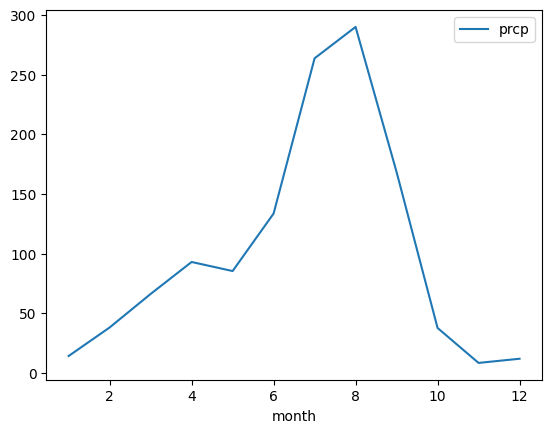

In [121]:
normal.plot(y=['prcp'])
plt.show()

## Aggregation

In [128]:
start = datetime(2018, 1, 1)
end = datetime(2022, 12, 31)

data = Daily('63450', start=start, end=end)

data = data.normalize()

# Aggregate weekly
# data = data.aggregate('1W') 

# Aggregate monthly
# data = data.aggregate('ME')

# Aggregate yearly
#data = data.aggregate('YE')

data = data.fetch()

data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-12-31,16.7,6.9,30.2,327.7,NaN,84.9,12.3,NaN,1019.2,0
2019-12-31,17.3,3.3,76.0,568.1,NaN,86.6,12.8,NaN,1019.8,0
2020-12-31,17.2,1.6,29.7,1211.2,NaN,94.7,12.4,NaN,1019.7,0
2021-12-31,16.9,4.0,28.8,333.1,NaN,84.4,13.1,NaN,1018.0,0
2022-12-31,17.4,1.0,29.6,995.9,NaN,80.6,12.7,NaN,1020.2,0


## Get data near Addis Ababa, Ethiopia

In [135]:
# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

# Create Point for Addis Ababa, Ethiopia
addis_ababa = Point(9.03, 38.74, 2355) # lat, lon ,  elevation


# Get daily data for 2023
data = Daily(addis_ababa, start, end)

data = data.fetch()

data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-01-01,13.9,9.0,19.0,1.5,NaN,83.0,17.2,NaN,1023.7,NaN
2023-01-02,16.1,10.5,21.8,1.0,NaN,82.0,18.3,NaN,1026.2,NaN
2023-01-03,14.3,11.0,22.0,0.0,NaN,83.0,19.5,NaN,1027.7,NaN
2023-01-04,14.4,6.9,21.6,0.0,NaN,71.0,14.6,NaN,1025.7,NaN
2023-01-05,15.6,9.0,23.0,0.0,NaN,61.0,14.0,NaN,1021.7,NaN


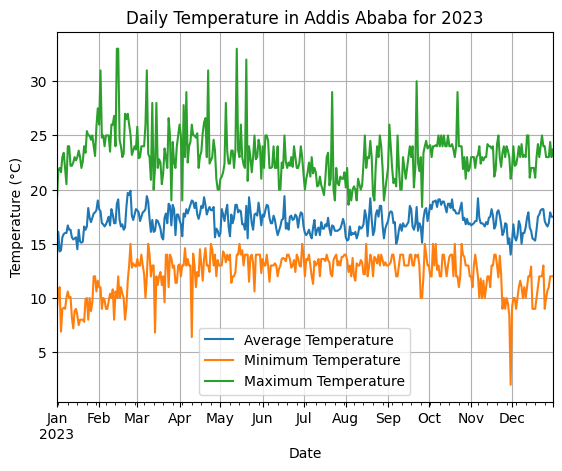

In [136]:
# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.title('Daily Temperature in Addis Ababa for 2023')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(['Average Temperature', 'Minimum Temperature', 'Maximum Temperature'])
plt.grid(True)
plt.show()
